<a href="https://colab.research.google.com/github/ramyamahesh1126/Dimensionality-Reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demonstrate dimensionality reduction for image dataset. MNIST dataset is chosen for dimensionality reduction. This dataset contains 28 * 28 images of handwritten digits which means 784 features.

In [ ]:
!pip install umap-learn[plot]

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import umap

Dividing the dataset into test and train dataset.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Reshape the 28x28 pixel images into a single 784px vector using .reshape

In [ ]:
x_train = np.reshape(x_train, (len(x_train), -1))/255
x_test = np.reshape(x_test, (len(x_test), -1))/255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


PCA

In [ ]:
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=0.85))]
pipeline = Pipeline(steps)
pipeline.fit(x_train)

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.85,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [ ]:
#Check number of components extracted to account for 85% of the variance
pipeline['pca'].n_components_

185

In [ ]:
reduced = pipeline.inverse_transform(pipeline.transform(x_train))

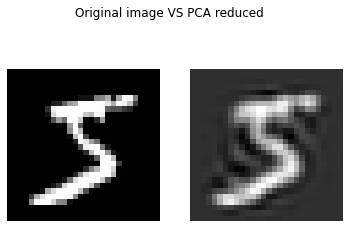

In [ ]:
# let us visualize the PCA reduced number
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x_train[0].reshape(28,28), cmap='gray')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[0]))
plt.show()

SVD

In [ ]:
steps = [('scaling', StandardScaler()), ('clf', SVC())]

pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# time taken
t_all_feats = time() - t0
print("Training and classification done in {}s".format(t_all_feats))

Reduced PCA to 50 components

In [ ]:
# define pipeline steps
steps = [('scaling', StandardScaler()), ('reduce_dim', PCA(n_components=50)), ('clf', SVC())]
pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

t_reduced_feats = time() - t0
print("Training and classification done in {}s".format(t_reduced_feats))
print("Speedup {}x".format(t_all_feats/t_reduced_feats))

accuracy: 0.9708 

[[ 968    0    1    1    1    4    4    1    0    0]
 [   0 1125    4    1    0    1    1    0    2    1]
 [   3    0 1007    3    1    1    1   10    5    1]
 [   0    0    0  986    2    4    0    8    8    2]
 [   0    1    7    1  949    0    4    4    2   14]
 [   2    0    0   12    1  864    7    1    4    1]
 [   4    3    1    1    4    7  933    1    4    0]
 [   3    9   13    1    3    0    0  983    2   14]
 [   3    0    3   11    5    5    2    4  937    4]
 [   3    5    1    8   14    1    0   14    7  956]]
Training and classification done in 76.14587187767029s
Speedup 14.409616908516524x


Visualisation with PCA

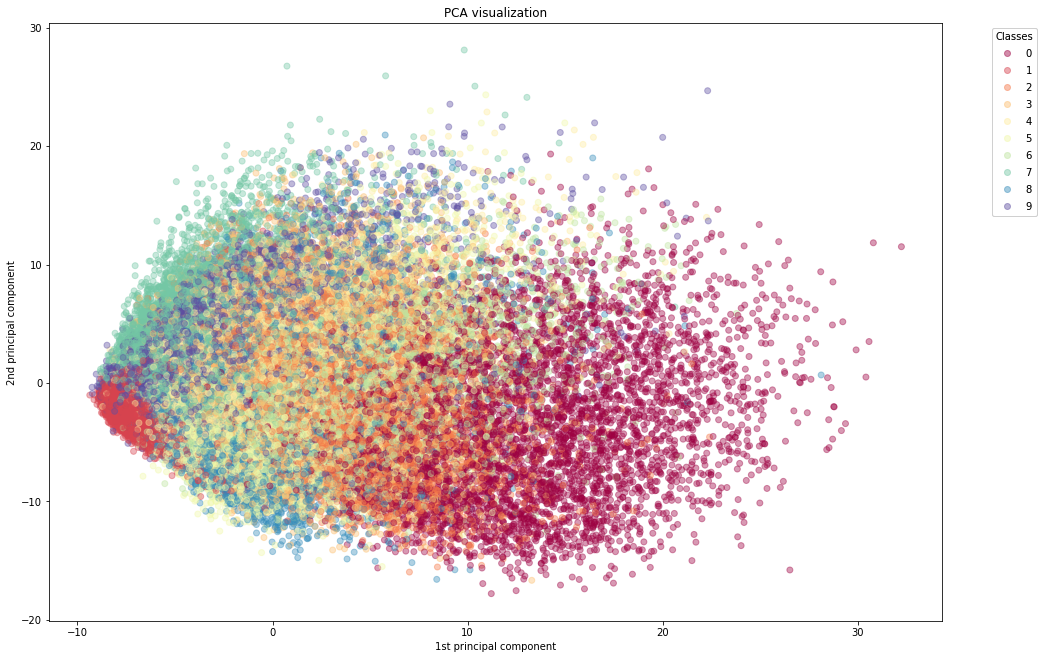

CPU times: user 8.44 s, sys: 1.97 s, total: 10.4 s
Wall time: 6.83 s


In [ ]:
%%time

# define pipeline steps
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dim_reduction', PCA(n_components=2))
])

pca_results =  pca_pipeline.fit_transform(x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=pca_results[:,0], 
    y=pca_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

t-SNE

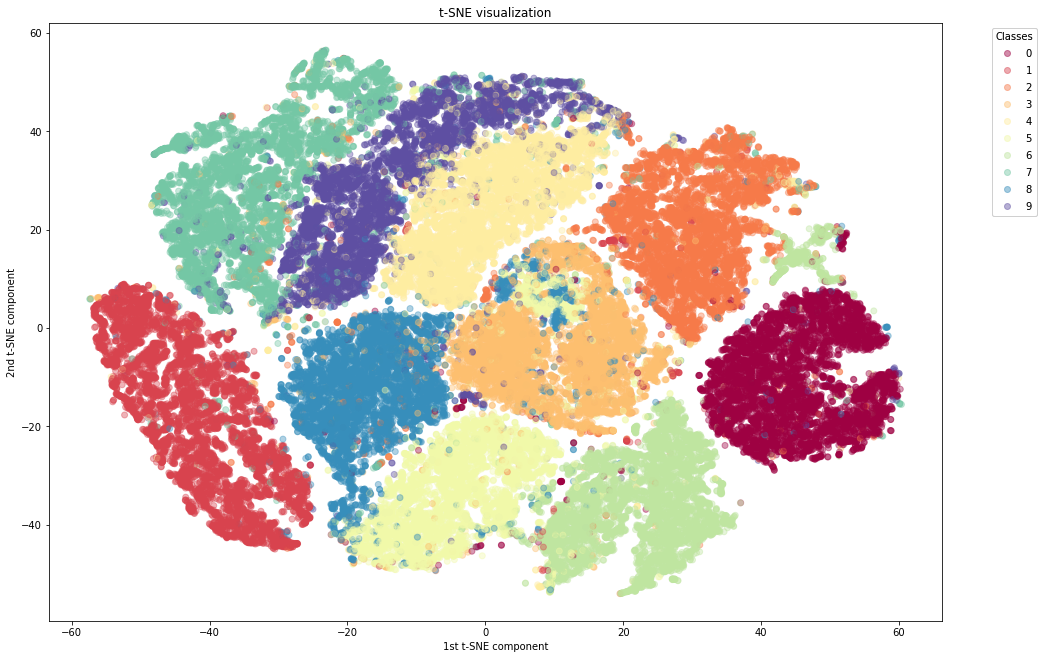

CPU times: user 30min 36s, sys: 5.23 s, total: 30min 42s
Wall time: 18min 48s


In [ ]:
%%time

# define pipeline steps
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    # reduce to 50 PCA components, before t-SNE
    # otherwise, it is gonna take forever to finish…
    ('dim_reduction', PCA(n_components=50)), 
    ('2d_reduction',  TSNE(n_components=2, init='pca', random_state=42))
])

tsne_results =  tsne_pipeline.fit_transform(x_train)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()

UMAP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


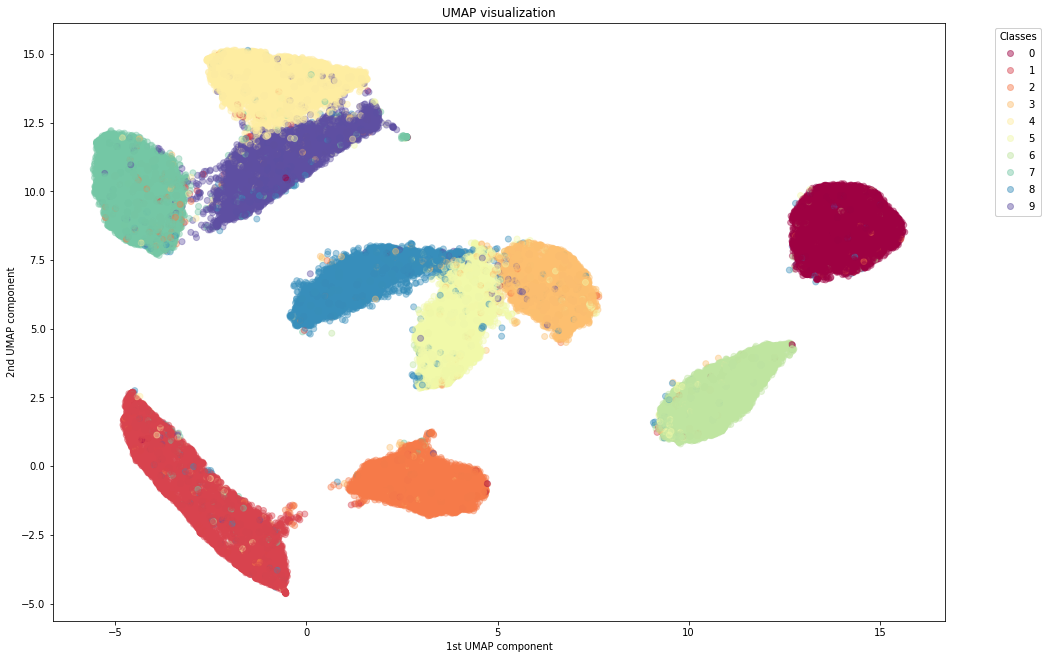

CPU times: user 2min, sys: 1.96 s, total: 2min 2s
Wall time: 1min 49s


In [ ]:
%%time

# run UMAP
umap_results =  umap.UMAP(n_components=2, random_state=42).fit_transform(x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=umap_results[:,0], 
    y=umap_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4
)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("UMAP visualization")
plt.xlabel("1st UMAP component")
plt.ylabel("2nd UMAP component")
plt.show()

ISOMAP

In [ ]:
### Step 1 - Configure the Isomap function, note we use default hyperparameter values in this example
from sklearn.manifold import Isomap
embed3 = Isomap(
    n_neighbors=5, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)



In [ ]:
### Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
X_trans3 = embed3.fit_transform(x_train)

KeyboardInterrupt: ignored

In [ ]:
### Step 3 - Print shape to test
print('The new shape of X: ',X_trans3.shape)

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )


In [ ]:
# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

LLE

In [ ]:
# for every point create an id sorted vector of distance from every other point

num_samples = 3000
X, color = datasets.make_s_curve(num_samples)

df = (spark.createDataFrame(sc.parallelize(X.tolist()).zipWithIndex().
                          map(lambda x: (x[1], mlVs.dense(x[0]))), ["id", "features"]))    



udf_dist = udf(lambda x, y:  float(x.squared_distance(y)), DoubleType())


df_2 = df

df = df.crossJoin(df ).toDF('x_id', 'x_feature', 'y_id', 'y_feature')
df = df.withColumn("sim", udf_dist(df.x_feature, df.y_feature))

df = df.drop("x_feature")

st = struct([name for name in ["y_id", "sim","y_feature"]]).alias("map")
df = df.select("x_id", st)
df  = df.groupby("x_id").agg(collect_list("map").alias("map"))
df = df.join(df_2, df_2.id == df.x_id, "inner").drop("x_id")

In [ ]:
# calculate local neighborhood matrix

def get_weights(map_list, k, features, reg):


    sorted_map = sorted(map_list, key = lambda x: x[1])[1:(k+1)]

    neighbors = np.array([s[2] for s in sorted_map])
    ind = [s[0] for s in sorted_map]

    nbors, n_features = neighbors.shape

    neighbors_mat = neighbors - features.toArray().reshape(1,n_features)

    cov_neighbors = np.dot(neighbors_mat, neighbors_mat.T)

    # add regularization term
    trace = np.trace(cov_neighbors)
    if trace > 0:
        R = reg * trace
    else:
        R = reg

    cov_neighbors.flat[::nbors + 1] += R

    weights = linalg.solve(cov_neighbors, np.ones(k).T, sym_pos=True)
    weights = weights/weights.sum()

    full_weights = np.zeros(len(map_list))
    full_weights[ind] = weights

    return(Vectors.dense(full_weights))

udf_sort = udf(get_weights, mllibVUDT())

df = df.withColumn("weights", udf_sort("map", lit(10), "features", lit(0.001)))

Try This


In [ ]:
# Make it thinner
x_train[:, 1] *= .5

# Create a flat addon to the top of the swiss roll
X_x=np.zeros((300,1))
X_y=np.random.uniform(low=0, high=10, size=(300,1))
X_z=np.random.uniform(low=14, high=25, size=(300,1))
X2=np.concatenate((X_x, X_y, X_z), axis=1)
y2=X_z.reshape(300)


ValueError: ignored

In [ ]:
# Create a 3D scatter plot
import plotly.express as px
def Plot3D(X, y, plot_name):
    fig = px.scatter_3d(None, 
                        x=x_train[:,0], y=x_train[:,1], z=x_train[:,2],
                        color=y_train,
                        height=800, width=800
                       )
    # Update chart looks
    fig.update_layout(title_text=plot_name,
                      showlegend=False,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=1.75, z=1)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, 
                                  line=dict(color='black', width=0.1)))
    fig.update(layout_coloraxis_showscale=False)
    return fig

In [ ]:
Plot3D(x_train, y_train, "Regular")

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE # for LLE dimensionality reduction
from sklearn.manifold import Isomap
def run_lle(num_neighbors, dims, mthd, data):
    # Specify LLE parameters
    embed_lle = LLE(n_neighbors=num_neighbors, # default=5, number of neighbors to consider for each point.
                    n_components=dims, # default=2, number of dimensions of the new space 
                    reg=0.001, # default=1e-3, regularization constant, multiplies the trace of the local covariance matrix of the distances.
                    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’, auto : algorithm will attempt to choose the best method for input data
                    #tol=1e-06, # default=1e-6, Tolerance for ‘arpack’ method. Not used if eigen_solver==’dense’.
                    #max_iter=100, # default=100, maximum number of iterations for the arpack solver. Not used if eigen_solver==’dense’.
                    method=mthd, # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’
                    #hessian_tol=0.0001, # default=1e-4, Tolerance for Hessian eigenmapping method. Only used if method == 'hessian'
                    modified_tol=1e-12, # default=1e-12, Tolerance for modified LLE method. Only used if method == 'modified'
                    neighbors_algorithm='auto', # {‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’, algorithm to use for nearest neighbors search, passed to neighbors.NearestNeighbors instance
                    random_state=42, # default=None, Determines the random number generator when eigen_solver == ‘arpack’. Pass an int for reproducible results across multiple function calls.
                    n_jobs=-1 # default=None, The number of parallel jobs to run. -1 means using all processors.
                   )
    # Fit and transofrm the data
    result = embed_lle.fit_transform(data)
    
    # Return results
    return result


In [ ]:
# Function for performing Isomap
def run_isomap(num_neighbors, dims, data):
    # Specify Isomap parameters
    embed_isomap = Isomap(n_neighbors=num_neighbors, n_components=dims, n_jobs=-1)
    
    # Fit and transofrm the data
    result = embed_isomap.fit_transform(data)
    
    # Return results
    return result

In [ ]:
# Standard LLE on a regular swiss roll
std_lle_res=run_lle(num_neighbors=30, dims=2, mthd='standard', data=x_train)

# Modified LLE on a regular swiss roll
mlle_res=run_lle(num_neighbors=30, dims=2, mthd='modified', data=x_train)

# Isomap on a regular swiss roll
isomap_res=run_isomap(num_neighbors=30, dims=2, data=x_train)



KeyboardInterrupt: ignored

In [ ]:

Plot2D(std_lle_res, y, 'Regular Swiss Roll - LLE')
Plot2D(mlle_res, y, 'Regular Swiss Roll - MLLE')
Plot2D(isomap_res, y, 'Regular Swiss Roll - Isomap')

Dimensionality Reduction of Text Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("LDA of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
plt.savefig('PCA vs LDA.png', dpi=80)

SVD

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("Truncated SVD of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("SVD1", fontsize=12)
ax[1].set_ylabel("SVD2", fontsize=12)
plt.savefig('PCA vs SVD.png', dpi=100)

T-SNE

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca)

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pca = PCA()
tsne = TSNE()
tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])
X_tsne = tsne_after_pca.fit_transform(X)

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE of IRIS dataset", fontsize=15, pad=15)
plt.savefig('t-SNE.png')


ISOMAP

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1')
plt.title("Isomap of IRIS dataset", fontsize=15, pad=15)
plt.savefig('Isomap.png')